Создайте новую колонку, которая выражает отношение атаки к
защите для всех юнитов, и постройте график для анализа этого
отношения. Найдите юнита, у которого отношение атаки к защите

(рассчитанное ранее) ближе всего к 1, и выведите его
характеристики. (3 балла)

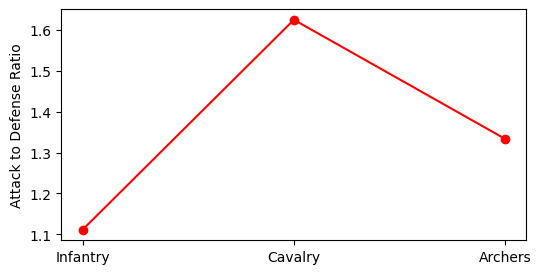

       name  attack_infantry  attack_cavalry  attack_ranged  defense_infantry  \
0  Infantry                5               3              2                 4   

   defense_cavalry  defense_ranged     ratio  ratio_normalized  
0                2               3  1.111111          0.111111  


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('unit_characteristics.csv')
data['ratio'] = (data['attack_infantry'] + data['attack_cavalry'] + data['attack_ranged'])/(data['defense_cavalry'] + data['defense_infantry'] + data['defense_ranged'])

plt.figure(figsize=(6, 3))
plt.plot(data['name'], data['ratio'], marker='o', linestyle='-', color='r')
plt.ylabel('Attack to Defense Ratio')
plt.show()
data.to_csv('..//cache//lab2//unit_characteristics_modified.csv', index=False)
data['ratio_normalized'] = abs(data['ratio'] - 1)

data_sorted = data.sort_values(by=['ratio_normalized'])

print(data_sorted.head(1))


Используйте pandas для построения графика, отображающего атаку
и защиту юнитов (например, столбчатую диаграмму или иную
другую). (2 балла)

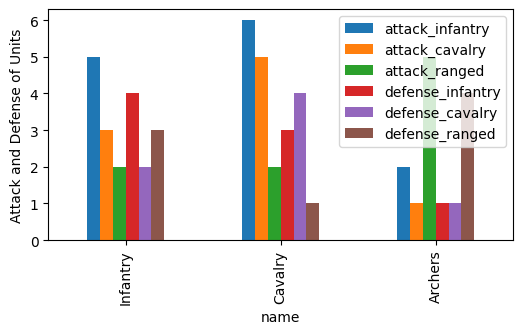

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('unit_characteristics.csv')
data.set_index('name').plot(kind='bar', figsize=(6, 3))
plt.ylabel('Attack and Defense of Units')
plt.show()

Найдите все битвы, в которых участвуют юниты, у которых атака по
коннице больше 4 и защита по коннице больше 3, и выведите список
этих битв. Для полученного датафрейма создайте столбчатую
диаграмму распределения исходов битв. (3 балла)

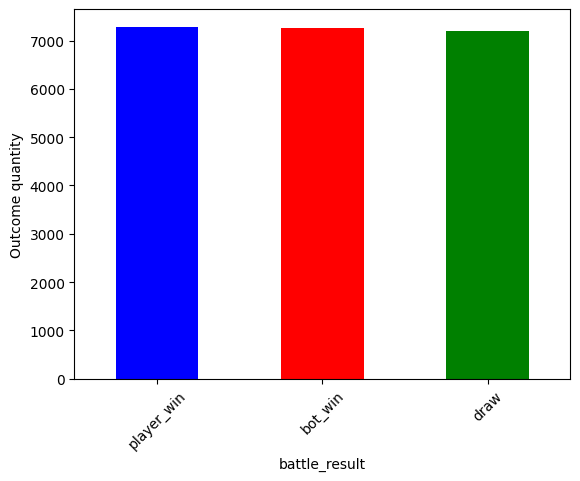

In [46]:
import pandas as pd

battle_results = pd.read_csv('battle_results.csv')
unit_characteristics = pd.read_csv('unit_characteristics.csv')
chosen_types_rows = unit_characteristics[(unit_characteristics['attack_cavalry'] > 4) & (unit_characteristics['defense_cavalry'] > 3)]
chosen_types = chosen_types_rows['name'].str.lower().tolist()

def has_chosen_units(army: list) -> bool:
    global chosen_types_rows
    return any(unit in chosen_types for unit in army)

battle_results['player_army'] = battle_results['player_army'].apply(lambda x: x.split(","))
battle_results['bot_army'] = battle_results['bot_army'].apply(lambda x: x.split(","))

filtered = battle_results[battle_results['player_army'].apply(has_chosen_units) | battle_results['bot_army'].apply(has_chosen_units)]
filtered.to_csv("..//cache//lab2//battle_results_modified.csv", index=False)
outcomes = filtered['battle_result'].value_counts()

outcomes.plot(kind='bar', color=['blue', 'red', 'green'])
plt.ylabel('Outcome quantity')
plt.xticks(rotation=45)
plt.show()